<img align="right" src="../../additional_data/banner_siegel.png" style="width:1000px;">

# Data Lookup and Loading

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Products used**: `Sentinel-2`
* **Prerequisites**:  Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_jupyter_introduction.ipynb)
    * The basic structure of the eo2cube [satellite datasets](02_eo2cube.ipynb)

## Background

A "datacube" is a digital information architecture that specialises in hosting and cataloguing spatial information. Eo2cube is based on the [Open Data Cube](https://www.opendatacube.org/) infrastructure and specialises in storing remotely sensed data, particularly from Earth Observation satellites such as Landsat and Sentinel-2. The eo2cube contains multiple analyse ready satellite data "products". These data products are often composed of a range of "measurements" such as the suite of remote sensing band values. This notebook will focus on several straightforward ways to inspect the product,  measurement of a datacube, as well as to run data query and loading the data using a wide range of options, including resampling and interpolation.

## Description

This notebook demonstrates how to **browse the available products/ measurements** stored within, and how to **load data** from the eo2cube datacube by using the `dc.load()` function. Topics covered include:

* How to connect to the datacube
* How to list all the products/ measurements
* Loading data with the `dc.load()`function
* Customising the `dc.load()`query
* Tips and tricks to simplify the data loading process

***

## Load packages

The `datacube` package is required to query the eo2cube datacube database and load the requested data. The pandas package is required to format tables. The `with_ui_cbk` function from `odc.ui` enables a progress bar when loading large amounts of data

In [23]:
import datacube
import pandas as pd
from odc.ui import with_ui_cbk

# Set some configurations for displaying tables nicely
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', None)

## Datacube connection

After importing the datacube package, you are ready to connect to the eo2cube datacube. Users need to specify a name for their session, known as the app name. This name is generated by the user and is used to track down issues with database queries. It does not have any effect on the analysis. Use a short name that is consistent with the purpose of your notebook such as the way 03_Products_and_measurements has been used as the app name in this notebook.

The resulting dc object provides access to all the data contained within the eo2cube datacube.

In [24]:
dc = datacube.Datacube(app = '03_Products_and_measurement') #datacube connection

## List products

Once a datacube instance has been created, users can explore the products and measurements stored within.
The following cell lists all products that are currently available in the eo2cube datacube by using the dc.list_products() function.

In [25]:
dc.list_products()

,name,description,license,default_crs,default_resolution
name,,,,,
ls8_c2l2_sr,ls8_c2l2_sr,USGS Landsat 8 Collection 2 Level-2 Surface Reflectance,CC-BY-4.0,None,None
ls8_c2l2_st,ls8_c2l2_st,USGS Landsat 8 Collection 2 Level-2 Surface Temperature,CC-BY-4.0,None,None
meteo_demmin,meteo_demmin,Meteorological parameters for the Agrisens Project,None,None,None
s1_coherence_ascending,s1_coherence_ascending,Sentinel-1 Coherence Product (6 day interval ascending),None,None,None
s1_coherence_descending,s1_coherence_descending,Sentinel-1 Coherence Product (6 day interval descending),None,None,None
s1_h2a_ascending,s1_h2a_ascending,Sentinel-1A/B SAR Dual-polarimetric decomposition scenes (ascending),None,None,None
s1_h2a_descending,s1_h2a_descending,Sentinel-1A/B SAR Dual-polarimetric decomposition scenes (descending),None,None,None
s1_rtc,s1_rtc,Sentinel 1 Gamma0 normalised radar backscatter,CC-BY-4.0,EPSG:4326,"(-0.0002, 0.0002)"
s2_l2a,s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud Optimized GeoTIFFs",None,None,None


## List measurements

Every product is associated with a range of available measurements. For the most time, these are the individual satellite bands.

The dc.list_measurements() function can be used to interrogate the measurements associated with a given product (specified by the name column from the table above). For example, s2_l2a_bavaria refers to the Sentinel 2 ARD L2A scenes product for Bavaria.

In [4]:
product = "s2_l2a"
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
B01,B01,uint16,1,0.0,"[band_01, coastal_aerosol]",NaN
B02,B02,uint16,1,0.0,"[band_02, blue]",NaN
B03,B03,uint16,1,0.0,"[band_03, green]",NaN
B04,B04,uint16,1,0.0,"[band_04, red]",NaN
B05,B05,uint16,1,0.0,"[band_05, red_edge_1]",NaN
B06,B06,uint16,1,0.0,"[band_06, red_edge_2]",NaN
B07,B07,uint16,1,0.0,"[band_07, red_edge_3]",NaN
B08,B08,uint16,1,0.0,"[band_08, nir, nir_1]",NaN
B8A,B8A,uint16,1,0.0,"[band_8a, nir_narrow, nir_2]",NaN


## Explore Data availabilty

In order to check which scenes are available, we can use the function DcViewer in order to interactivly explore the data

In [5]:
from odc.ui import DcViewer

dcv = DcViewer(dc, time='2019-04-24', center=(53,13), zoom=8)
dcv

## Display Map
Before loading the data, it is a good idea to first check out the area of interest in a map. We can use display_map function for that.

**Don't forget to import function `display_map` from `DEAPlotting` when you load the libraries.**

In [6]:
from dea_tools.plotting import display_map
display_map([12.94 ,13.05],[53.88,53.94], crs = 'EPSG:4326')

## Loading data with the `dc.load()`function

Loading data from the datacube uses the `dc.load()` function.

The function requires the following minimum arguments:

* product: The data product to load (to see all available eo2cube products, see the [Products and measurements notebook](03_products_and_measurements.ipynb)).
* x: The spatial region in the x dimension. By default, the x and y arguments accept queries in a geographical co-ordinate system WGS84, identified by the EPSG code 4326.
* y: The spatial region in the y dimension. The dimensions longitude/latitude and x/y can be used interchangeably. It is also possible to use the extent of an imported shapefile as x/y (see the [notebook for working with vectordata](XX_vectordata.ipynb)).
* time: The temporal extent. The time dimension can be specified using a tuple of datetime objects or strings in the “YYYY”, “YYYY-MM” or “YYYY-MM-DD” format.
* output_crs: Reproject the data from the default or stored CRS into a specified CRS
* resolution: Defines the output resolution

The used product is defined by its name. The spatial extent is defined by lat/lon coordinates. The time intervall ist defined by the format "YYYY-MM-DD". The argument `progess_cbk` with the imported `with_ui_cbk()`function enables loading bar.

In [29]:
data = dc.load(product= "s2_l2a",
               x= [12.94 ,13.05],
               y= [53.88,53.94],
               time= ("2021-08-01", "2021-08-15"),
               output_crs = "EPSG:32632",
               resolution = (-10, 10),
               #sat_orbit_state = 'descending',
               progress_cbk=with_ui_cbk())
    
data

<xarray.Dataset>
Dimensions:      (time: 4, y: 709, x: 760)
Coordinates:
  * time         (time) datetime64[ns] 2021-08-04T10:25:59 ... 2021-08-14T10:...
  * y            (y) float64 5.984e+06 5.984e+06 ... 5.977e+06 5.977e+06
  * x            (x) float64 7.586e+05 7.586e+05 ... 7.662e+05 7.662e+05
    spatial_ref  int32 32632
Data variables: (12/15)
    B01          (time, y, x) uint16 13149 12014 12014 12014 ... 270 281 281 281
    B02          (time, y, x) uint16 11384 11136 11144 11184 ... 253 267 265 201
    B03          (time, y, x) uint16 10608 10416 10456 10416 ... 446 466 451 351
    B04          (time, y, x) uint16 10448 10272 10176 10088 ... 248 283 280 237
    B05          (time, y, x) uint16 11565 11162 11162 10796 ... 693 748 748 533
    B06          (time, y, x) uint16 11258 10864 10864 10502 ... 2215 2215 1861
    ...           ...
    B09          (time, y, x) uint16 15693 15693 15693 15693 ... 2808 2808 2808
    B11          (time, y, x) uint16 8156 7844 7844 7738 ... 1064 1240 1240 1108
    B12          (time, y, x) uint16 7352 6777 6777 6707 ... 497 607 607 559
    SCL          (time, y, x) uint8 9 9 9 9 9 9 9 9 9 9 ... 4 4 4 4 4 4 4 4 4 4
    AOT          (time, y, x) uint16 144 144 144 144 144 144 ... 84 84 84 84 84
    WVP          (time, y, x) uint16 1821 1821 1821 1821 ... 2171 2133 2133 2039
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

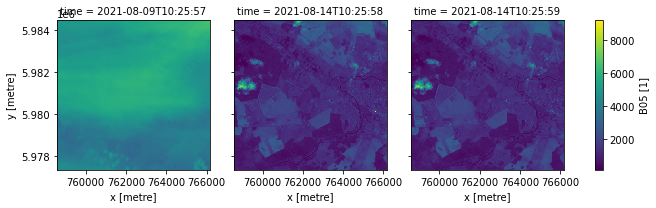

In [30]:
data.B05.isel(time=[1,2,3]).plot(col="time")

## Customization of the `dc.load()` function

The query created above only used the basic arguments of the `dc.load()` function. However, it is possible to customize your loading query by using multiple other arguments. A detailed description of every useable argument can be found in the [original documentation of the `dc.load()` function](https://datacube-core.readthedocs.io/en/latest/dev/api/generate/datacube.Datacube.load.html) of the Opendatacube initiative. In this notebook we will present the most used arguments that allow easy and effective querying of eo2cube products.

### Specifying Measurements
<a id='first_query'></a>
The `measurements` argument provides the option to filter the desired product by its bands. This argument takes a list of the names of the desired measurement, as listed in the `dc.list_measurements()` function (see [notebook 03](03_products_and_measurements.ipynb)). If not provided, all stored measurements of the product will be loaded.

In the following code only the `blue`, `green` and `red` bands of the specified product are added to the query. The resulting dataset will only include the defined measurements.

In [31]:
data = dc.load(product= "s2_l2a",
               x= [12.94 ,13.05],
               y= [53.82,54.02],
               time= ("2020-01-01", "2020-01-15"),
               output_crs = "EPSG:32632",
               resolution = (-10, 10),
               measurements= ["blue", "green", "red"],
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 5, y: 2265, x: 849)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T10:25:50 ... 2020-01-12T10:...
  * y            (y) float64 5.993e+06 5.993e+06 ... 5.971e+06 5.971e+06
  * x            (x) float64 7.581e+05 7.581e+05 ... 7.665e+05 7.666e+05
    spatial_ref  int32 32632
Data variables:
    blue         (time, y, x) uint16 1024 962 933 937 ... 6256 6368 6784 6784
    green        (time, y, x) uint16 1100 1112 1110 1072 ... 5820 5880 5932 6208
    red          (time, y, x) uint16 855 861 922 850 664 ... 5436 5516 5700 5840
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

### Specifying CRS and Reprojecting 

To reproject the data from the default or stored CRS into a specified CRS, it is neccessary to define the `output_crs` and a new `resolution` for your data. The unit of the new `output_crs` and `resolution`must identical.

In [32]:
data = dc.load(product= "s2_l2a",
               x= [12.94 ,13.05],
               y= [53.88,53.94],
               measurements= ["blue", "green", "red"],
               time= ("2020-01-01", "2020-01-15"),
               output_crs = "EPSG:4326",
               resolution = (-0.0002734477121776, 0.0002734477121776),
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 5, latitude: 220, longitude: 403)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T10:25:50 ... 2020-01-12T10:...
  * latitude     (latitude) float64 53.94 53.94 53.94 ... 53.88 53.88 53.88
  * longitude    (longitude) float64 12.94 12.94 12.94 ... 13.05 13.05 13.05
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) uint16 676 669 715 ... 2186 2110
    green        (time, latitude, longitude) uint16 673 852 977 ... 1930 1888
    red          (time, latitude, longitude) uint16 622 670 676 ... 1786 1778
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

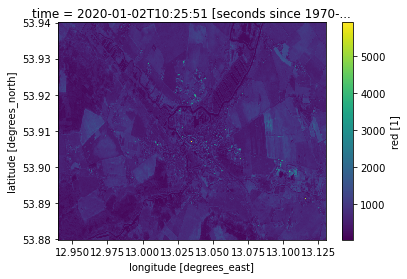

In [30]:
data.red.isel(time=1).plot()

### Spatial resampling

To resample the data to another resolution, multiple resampling methods are available. You can define the `resampling` argument with one method from the following:
`"nearest", "cubic", "bilinear", "cubic_spline", "lanczos", "average", "mode", "gauss", "max", "min", "med", "q1", "q3"`.
By default, the `dc.load()` function is using "nearest neighbour" resampling, which allocates each new pixel with the value of the closest input pixel. However, for some data (eg. continuous data) this may not be the most appropiate choice.

The example code below, resamples the specified product to a greater resolution of (-30, 30) meters using the bilinear interpolation method (`bilinear`). Note that the absolute number of pixels has been halved as the dataset has been resampled to twice the pixel size ([compare with the first query](#first_query))

In [33]:
data_10 = dc.load(product= "s2_l2a",
               x= [12.94 ,13.05],
               y= [53.88,53.94],
            time= ("2020-01-01", "2020-01-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32632",
               resolution = (-10,10),
               progress_cbk=with_ui_cbk())
    
data_30 = dc.load(product= "s2_l2a",
              x= [12.94 ,13.05],
               y= [53.88,53.94],
               time= ("2020-01-01", "2020-01-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32632",
               resolution = (-60,60),
               resampling = "bilinear",
               progress_cbk=with_ui_cbk())

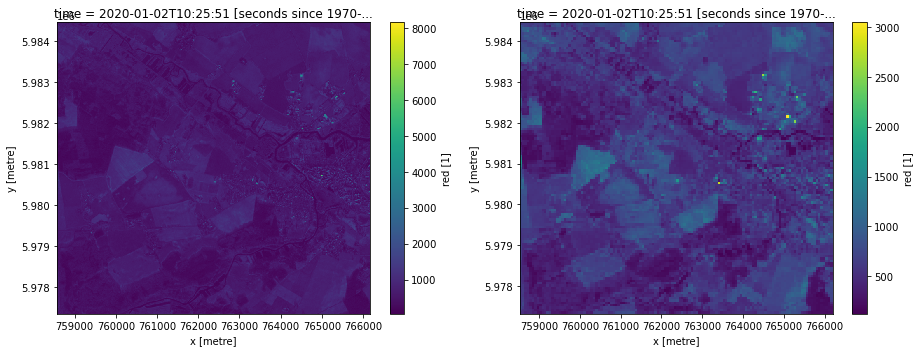

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(13,5))


data_10.red.isel(time=1).plot(ax=axes[0])
data_30.red.isel(time=1).plot(ax=axes[1])
plt.tight_layout()
plt.show()

It is also possible to define different resampling methods for different measurements. This is useful if a dataset stores continuous data and categorical data. For example, the Sentinel-2 dataset has a scene classification layer (`scl`) which contains categorical values about the quality of a single pixel. If you want to resample your continuous data to another resolution with the `bilinear` method but also include the categorical `scl` band (categorical) it is best to use an interpolation method that does not modify the data directly for the resampling of the categorical `scl` band. 

This can be done by using Python Dictionaries as value for the `resampling` argument. The following code resample continuous bands with `bilinear` interpolation but also uses the `nearest` (which does not modify the data values) for the categorical `scl` band.

In [33]:
data = dc.load(product= "s2_l2a",
               x= [12.94 ,13.05],
               y= [53.88,53.94],
               time= ("2020-04-01", "2020-04-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32632",
               resolution = (-20, 20),
               resampling = {"*": "bilinear", "scl": "nearest"},
               progress_cbk=with_ui_cbk())


data

<xarray.Dataset>
Dimensions:      (time: 9, y: 404, x: 661)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-01T10:25:52 ... 2020-04-13T10:...
  * y            (y) float64 1.601e+07 1.601e+07 1.601e+07 ... 1.6e+07 1.6e+07
  * x            (x) float64 -2.931e+04 -2.929e+04 ... -1.613e+04 -1.611e+04
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) uint16 10784 10673 10768 10833 ... 3184 3322 3632
    green        (time, y, x) uint16 9762 9720 9819 9775 ... 3077 3164 3241 3464
    red          (time, y, x) uint16 9334 9369 9398 9360 ... 3034 3121 3189 3362
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

### Group by argument

The `group_by` argument is a useful tool to combine/mosaic multiple scenes of one date (e.g. if the extent is visible in two sequential scenes of the satellite). Satellite datasets can have multiple observations per day with slightly different time stamps as the satellite collects data along its path. These observations can be combined by reducing the time dimension to the day level using `group_by = "solar_day"`. By default the scenes are simply copied together (e.g. the NA values of the first scene are filled with the values of the second scene). With the argument "fuse_func" the mosaicing can be controlled by the user (e.g. specify an interpolation method).

This example loads data for the first week in April 2020. Since the extent of the AOI is to big to be covered by just one Sentinel 2 scene there are multiple scenes (from contiguous paths) available for each date. By using the `group_by = "solar_day"` argument the `dc.load()` function automatically mosaics all scenes of a single date together. In this example no special interpolation method was defined.

In [39]:
data = dc.load(product= "s2_l2a",
               x= [12.94 ,13.05],
               y= [53.88,53.94],
               time= ("2020-04-01", "2020-04-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32632",
               resolution = (-20, 20),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 3, y: 355, x: 381)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-01T10:25:52 ... 2020-04-11T10:...
  * y            (y) float64 5.984e+06 5.984e+06 ... 5.977e+06 5.977e+06
  * x            (x) float64 7.586e+05 7.586e+05 ... 7.662e+05 7.662e+05
    spatial_ref  int32 32632
Data variables:
    blue         (time, y, x) uint16 12152 11930 11794 11680 ... 1584 1606 1616
    green        (time, y, x) uint16 11108 10910 10798 10586 ... 1656 1694 1660
    red          (time, y, x) uint16 10684 10474 10356 10116 ... 1488 1544 1544
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

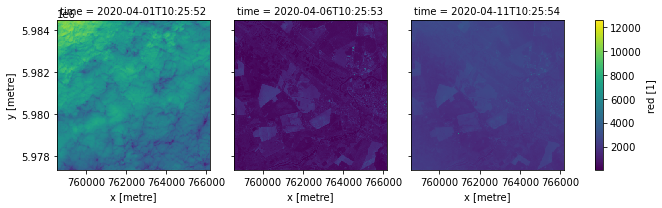

In [38]:
data.red.isel(time=[0,1,2]).plot(col="time")

## Define area interactively


In [40]:
from odc.ui import select_on_a_map

geopolygon = select_on_a_map(height='500px')



Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [41]:
data = dc.load(product= "s2_l2a",
               geopolygon = geopolygon,
               time= ("2020-04-01", "2020-04-15"),
               measurements= ["blue", "green", "red"],
               output_crs = "EPSG:32632",
               resolution = (-20, 20),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

data

<xarray.Dataset>
Dimensions:      (time: 3, y: 129, x: 261)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-01T10:25:52 ... 2020-04-11T10:...
  * y            (y) float64 5.981e+06 5.981e+06 ... 5.979e+06 5.979e+06
  * x            (x) float64 7.626e+05 7.626e+05 ... 7.678e+05 7.678e+05
    spatial_ref  int32 32632
Data variables:
    blue         (time, y, x) uint16 7541 7605 7609 7552 ... 2110 2104 2144 2150
    green        (time, y, x) uint16 6949 6987 6989 7024 ... 2192 2220 2192 2238
    red          (time, y, x) uint16 6715 6744 6804 6830 ... 1976 1954 1976 2008
Attributes:
    crs:           EPSG:32632
    grid_mapping:  spatial_ref

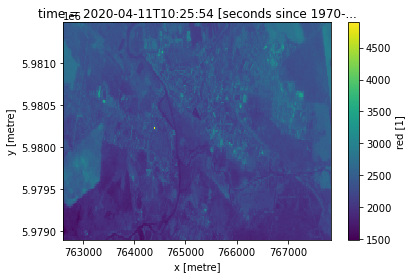

In [42]:
data.red.isel(time=2).plot()

## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/01_jupyter_introduction.ipynb)
2. [eo2cube](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/02_eo2cube_introduction.ipynb)
3. ***Loading Data (this notebook)***
4. [Xarray I: Data Structure](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/04_xarrayI_data_structure.ipynb)
5. [Xarray II: Index and Statistics](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/05_xarrayII.ipynb)
6. [Plotting data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/06_plotting_basics.ipynb)
7. [Spatial analysis](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/07_basic_analysis.ipynb)
8. [Parallel processing with Dask](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/08_parallel_processing_with_dask.ipynb)

The additional notebooks are designed for users to build up both basic and advanced skills which are not covered by the beginner's guide. Self-motivated users can go through them according to their own needs. They act as complements for the guide:
<br>

1. [Python's file management tools](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/I_file_management.ipynb)
2. [Image Processing basics using NumPy and Matplotlib](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/II_numpy_image_processing.ipynb)
3. [Vector Processing](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/III_process_vector_data.ipynb)
4. [Advanced Plotting](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/IV_advanced_plotting.ipynb)

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** January 2021